In [1]:
# Load all libraries

import xarray
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Find only the TREFHT files in the control files

files = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/*.TREFHT.*')
print(files)
print(len(files))

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.060001-069912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.070001-079912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.080001-089912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.090001-099912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.100001-109912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.110001-119912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.120001-129912.nc', '/data/keeling/a/cristi/a/d

In [3]:
one_dataset = xarray.open_dataset(files[0])
one_dataset

<xarray.Dataset>
Dimensions:       (time: 1200, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 0400-02-01 00:00:00 ... 0500-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    P0            float64 ...
    TREFHT        (time, lat, lon) float32 ...
    ch4vmr        (time) float64 ...
    co2vmr        (time) float64 ...
    date          (time) int32 ...
    date_written  (time) |S8 ...
    ...            ...
    ntrn          int32 ...
    sol_tsi       (time) float64 ...
    time_bnds     (time, nbnd) object ...
    time_written  (time) |S8 ...
    w_stag        (slat) float64 ...
    wnummax       (lat) int32 ...
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [3]:
# Process the datasets

control = xarray.open_mfdataset(files,combine="by_coords",use_cftime=True)
control

<xarray.Dataset>
Dimensions:       (time: 21612, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    TREFHT        (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    ...            ...
    ntrn          (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    sol_tsi       (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    w_stag        (time, slat) float64 dask.array<chunksize=(1200, 191), meta=np.ndarray>
    wnummax       (time, lat) int32 dask.array<chunksize=(1200, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [4]:
# Getting climatology by grouping by decade and finding the mean over time
# https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

control_T = control['TREFHT'].groupby((control['time'].dt.year//10)*10).mean('time')
control_T

<xarray.DataArray 'TREFHT' (year: 181, lat: 192, lon: 288)>
dask.array<stack, shape=(181, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * year     (year) int64 400 410 420 430 440 450 ... 2160 2170 2180 2190 2200
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

In [5]:
# Interdecadal variability by taking standard deviation

control_var = control_T.std('year')
control_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<_sqrt, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Interdecadal Variability')

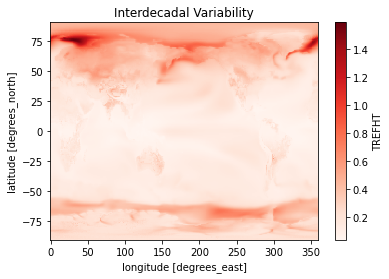

In [8]:
# Plot

control_var.plot(cmap='Reds')
plt.title('Interdecadal Variability')


Text(0.5, 1.0, 'Interdecadal Variability (0-1)')

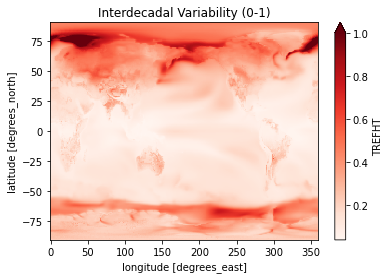

In [9]:
# keep to range of 0-1

control_var.plot(cmap='Reds', vmax=1)
plt.title('Interdecadal Variability (0-1)')

In [6]:
# Calculating decadal anomaly

control_anom = control['TREFHT'].groupby((control['time'].dt.year//10)*10) - control_T
control_anom

<xarray.DataArray 'TREFHT' (time: 21612, lat: 192, lon: 288)>
dask.array<sub, shape=(21612, 192, 288), dtype=float32, chunksize=(120, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
    year     (time) int64 400 400 400 400 400 400 ... 2200 2200 2200 2200 2200

In [7]:
# Calculating decadal variability

control_decadal_var = control_anom.std('time')
control_decadal_var

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<_sqrt, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Pre-Industrial Interdecadal Variability (??)')

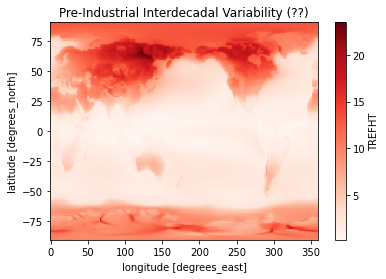

In [27]:
control_decadal_var.plot(cmap='Reds')
plt.title('Pre-Industrial Interdecadal Variability (??)')

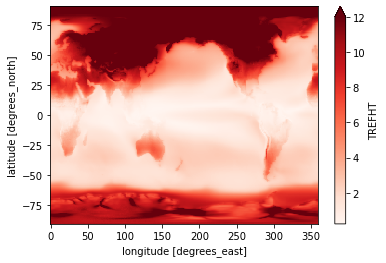

In [11]:
control_decadal_var.plot(cmap='Reds', vmax=12)


## Obsolete Methods

In [7]:
# Grouping by decade

year = control["time"].dt.year
decade = ((year - year[0]) / 10).astype(int)
decade

<xarray.DataArray 'year' (time: 21612)>
array([  0,   0,   0, ..., 180, 180, 180])
Coordinates:
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00

In [21]:
# Putting the decade variable in

control["decade"] = decade
control_T = control[["decade", "TREFHT"]]
control_T

<xarray.Dataset>
Dimensions:  (time: 21612, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Data variables:
    decade   (time) int64 0 0 0 0 0 0 0 0 0 ... 180 180 180 180 180 180 180 180
    TREFHT   (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [22]:
# Climatological mean

control_mean = control_T.groupby("decade").mean("time")
control_mean

<xarray.Dataset>
Dimensions:  (decade: 181, lat: 192, lon: 288)
Coordinates:
  * decade   (decade) int64 0 1 2 3 4 5 6 7 ... 173 174 175 176 177 178 179 180
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    TREFHT   (decade, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [29]:
# Anomalies over decades

control_anom = control_T['TREFHT'] - control_mean['TREFHT']
control_anom = control_anom.drop('decade')
control_anom = control_anom.sel(decade=1, drop=True)
control_anom

/data/keeling/a/mailes2/miniconda3/envs/paleoproj/lib/python3.10/site-packages/dask/array/core.py:4806: PerformanceWarning: Increasing number of chunks by factor of 18
  result = blockwise(


<xarray.DataArray 'TREFHT' (time: 21612, lat: 192, lon: 288)>
dask.array<getitem, shape=(21612, 192, 288), dtype=float32, chunksize=(1212, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00

In [ ]:
# Variability

control_variability = control_anom.std('')